# 1.1 Overview of Time Series Characteristics

---
*Definition*

A **univariate time series** is a sequence of measurements of the same variable collected over time.  Most often, the measurements are made at regular time intervals.

---

### Basic Objectives of the Analysis
1. Describe time series feature
2. Explain How past affects future
3. Explain How two time series are related
4. Predict future

### Types of models
1. current values is described by past values or erros (ARIMA)
2. Simple regression where time is used as Index 

Wnenever you encounter a time series look for folloiwng charecteristics
### Important charecteristics to consider
1. is there a **trend**?,
2. is there a **seasonality**?,
3. are there any **outliars**?,
4. is there any **long term cycle**?,
5. is there **constant variance** overtime,
6. is there any **abrupt change** in variance/levels,

#### Example 1

In [39]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib
import warnings
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
warnings.filterwarnings('ignore')
matplotlib.style.use("seaborn")
%matplotlib inline

In [40]:
quakes = pd.read_csv("./data/quakes.csv", delimiter='\t', header=None)
quakes.columns = ["year", "q"]

In [41]:
quakes.head()

,year,q
0,1900,13
1,1901,14
2,1902,8
3,1903,10
4,1904,16


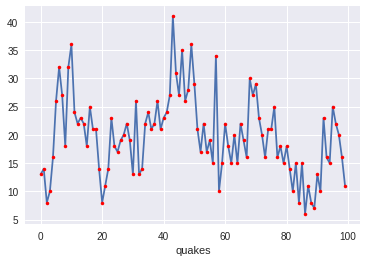

In [42]:
quakes.q.plot(marker='.',markerfacecolor='r', markeredgecolor='r')
plt.xlabel("quakes")
plt.ylabel("")
plt.show()

#### Features of the plot
1. No trend
2. No seasonality since it is an annual data
3. no obvious outliar 
4. difficult to say whether the variance remained constant thoughout

In [43]:
quakes["q-1"] = quakes.q.shift(1)
df1 = quakes.dropna()
df1.head()

,year,q,q-1
1,1901,14,13.0
2,1902,8,14.0
3,1903,10,8.0
4,1904,16,10.0
5,1905,26,16.0


In [44]:
import numpy as np
import statsmodels.api as sm

lets do regression on q and q-1

In [45]:
X = df1['q-1']
y = df1['q']
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      q   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     40.68
Date:                Sat, 08 Dec 2018   Prob (F-statistic):           6.11e-09
Time:                        14:34:39   Log-Likelihood:                -316.49
No. Observations:                  99   AIC:                             637.0
Df Residuals:                      97   BIC:                             642.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0369      1.806      5.004      0.0

getting the prediction of the model

In [46]:
df1["pred"] = model.predict(results.params, X)

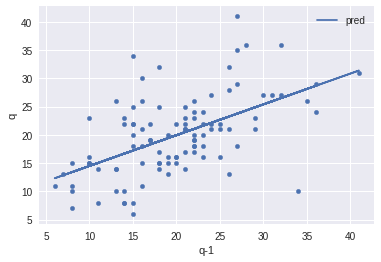

In [47]:
fig, ax = plt.subplots()
df1.plot.scatter("q-1", "q", ax=ax)
df1.plot("q-1", "pred", ax=ax)
plt.show()

the r square value is not that great 29% , so not going to give you great predictions

#### Residual Analysis
plot of residual versus fit is a very useful diagnostic tool.

In [48]:
df1['resi'] = df1.loc[:,'q'] - df1.loc[:,'pred']

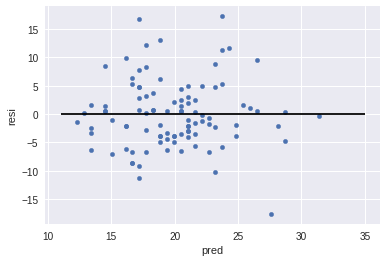

In [49]:
df1.plot.scatter("pred", "resi")
plt.hlines(0, 11,35)

does not show any serious problem, there might be an outliar at 28

#### Example 2 
quaterly beer production in australia

In [50]:
df2 = pd.read_csv("./data/quarterly-beer-production-in-aus.csv", header=None).iloc[:72,:]
df2.columns = ["Quarter", "beer"]
df2.head()

,Quarter,beer
0,1956Q1,284.4
1,1956Q2,212.8
2,1956Q3,226.9
3,1956Q4,308.4
4,1957Q1,262.0


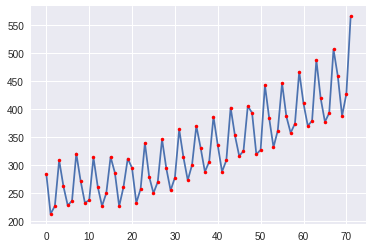

In [51]:
df2.beer.plot(marker='.', markerfacecolor='r', markeredgecolor='r')
plt.show()

#### Charecteristics of the data
1. There is an upward trend
2. there is no obvious outliar
3. there is a sesonality
4. variance might be increasing with time

#### Classical regression methods for trend and seasonal effects
1. use time index as predictor variable
2. quadratic trend so we can use $t$ and $t^2$
3. there is a seasonal effect so we might use flags for quarters
For linear trend:

$x_{t} = \beta_{1}t + \alpha_{1}S_{1}+\alpha_{2}S_{2}+\alpha_{3}S_{3}+\alpha_{4}S_{4}+\epsilon_{t}$

For quadratic trend

$x_{t} = \beta_{1}t +\beta_{2}t^2+\alpha_{1}S_{1}+\alpha_{2}S_{2}+\alpha_{3}S_{3}+\alpha_{4}S_{4}+\epsilon_{t}$

We have deleted the intercept because we have taken all the 4 quarters

In [52]:
df2['qtr'] = df2['Quarter'].apply(lambda x: x[-2:])
df2['time'] = df2.index+1
df2['time_sq'] = df2.time ** 2
df2 = pd.get_dummies(df2, columns=["qtr"])

In [53]:
df2.head()

,Quarter,beer,time,time_sq,qtr_Q1,qtr_Q2,qtr_Q3,qtr_Q4
0,1956Q1,284.4,1,1,1,0,0,0
1,1956Q2,212.8,2,4,0,1,0,0
2,1956Q3,226.9,3,9,0,0,1,0
3,1956Q4,308.4,4,16,0,0,0,1
4,1957Q1,262.0,5,25,1,0,0,0


In [54]:
X = df2.iloc[:,2:]
y = df2.beer
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   beer   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     635.2
Date:                Sat, 08 Dec 2018   Prob (F-statistic):           2.26e-54
Time:                        14:34:40   Log-Likelihood:                -272.42
No. Observations:                  72   AIC:                             556.8
Df Residuals:                      66   BIC:                             570.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
time           0.4070      0.255      1.593      0.1

In [55]:
df2["pred"] = model.predict(results.params, X)
df2["res"] = df2["beer"].sub(df2["pred"])

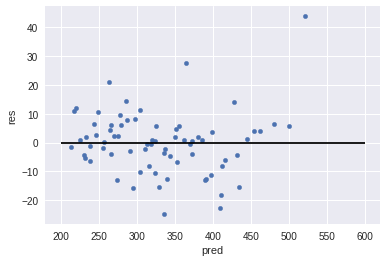

In [56]:
df2.plot.scatter("pred", "res")
plt.hlines(0,200,600)
plt.show()

There is normally everything looks ok , just the at the end there are some string of positive errors and there is a outliar in the end

For residual the notmal result is that they should be unrelated to each other. That mean they cant be predicted by previous values.

#### Sample Autocorrelation Function (ACF)
ACF gives correlation between $x_{t}$ and series of lags $1, 2, 3$ and so on

it can be use to find the ACF of the residulas as well. 

Lets see the acf grapf of the residuals of the example 1 and 2

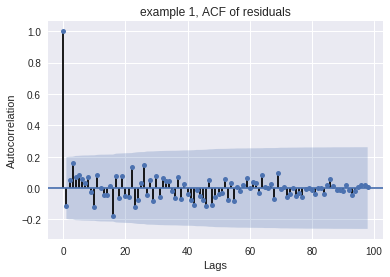

In [57]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df1.resi)
plt.title("example 1, ACF of residuals")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.show()

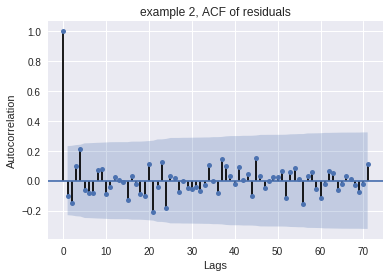

In [58]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df2.res)
plt.title("example 2, ACF of residuals")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.show()

there is no significant aotocorrelation present in the residuals of the both datasets

# 1.2 Sample ACf and properties of AR(1) model

This lesson defines sample auto correlation function in general and derives the pattern of the AR(1) model.


#### Stationary series
As the name suggests things are going to be same thoughout the time horizon
what are those things 

A series is said to be **weakly stationary series** if it satisfy the folloing properties 
1. $E(x_{t})$ is same for all $t$
2. The variance of $x_{t}$ is same for all $t$
3. The covaiance (and correlation) between $x_{t}$ and $x_{t-h}$ is same for all $t$

#### ACF Definition
let $x_{t}$ denote the  value of the time series at time $t$. Then ACF gives the correlation between $x_{t}$ and $x_{t-h}$ for all $h = 1, 2, 3, ...$

auto correlation between $x_{t}$ and $x_{t-h}$ is 

$\frac{Covariance(x_{t}, x_{t-h})}{Std.Dev(x_{t})Std.Dev(x_{t-h})}$ 

but since for the weakly stationary series $Std.Dev(x_{t}) = Std.Dev(x_{t-h})$ the formula becomes 

$\frac{Covariance(x_{t}, x_{t-h})}{Variance(x_{t})}$ 




Many stationary series have recognizable ACF pattern. Most series that we encounter are not stationary.
1. Continuously upward series 
2. series with seasonality
Both violated the requirements for stationary series

#### First order auto regressive model 
We now look at the theoretical properties of the AR(1) model. the algebric expression of the model is 

$x_{t} = \delta + \phi_{1}x_{t-1}+w_t$

assumptios :
1. $w_{t}\stackrel{iid}{\sim} N(0, \sigma_{w}^2)$ meaning errors are independently distributed with a normal distribution that has a mean of 0 and constant variance of $\sigma_{w}^2$
2. $w_{t}$(errors) are independednt of $x_{t}$
3. The series $x_{t}, x_{t-1},x_{t-2}$ is weakly stationary. A requirement of AR1 model is that $|\phi_{1}| < 1$

#### Properties of AR(1)
* The mean (Theoratical) of $x_{t}$ is

$\mu = \frac{\delta}{1-\phi_{1}}$

* The variance = 

$Var(x_{t} = \frac{\sigma_{w}^2}{1-\phi_{1}^2}$

* The correlation between observation h time periods apart is 

$\rho_{h} = \phi_{1}^h$

#### pattern of ACF for AR(1) model
for a positive vale of $\phi_{1}$  the ACF exponentially decreases to 0 as the lag h increases. For negative $\phi_{1}$ the correlation also decreases to 0 as h increase but he sign of correlation alternate between positive and negative

In [59]:
from statsmodels.tsa.arima_process import ArmaProcess
def generate_ar1_sample(phi):
    ar1 = np.array([1, -1.*phi])
    ma1 = np.array([1])
    ar1_process = ArmaProcess(ar1, ma1)
    return ar1_process.generate_sample(nsample=100)


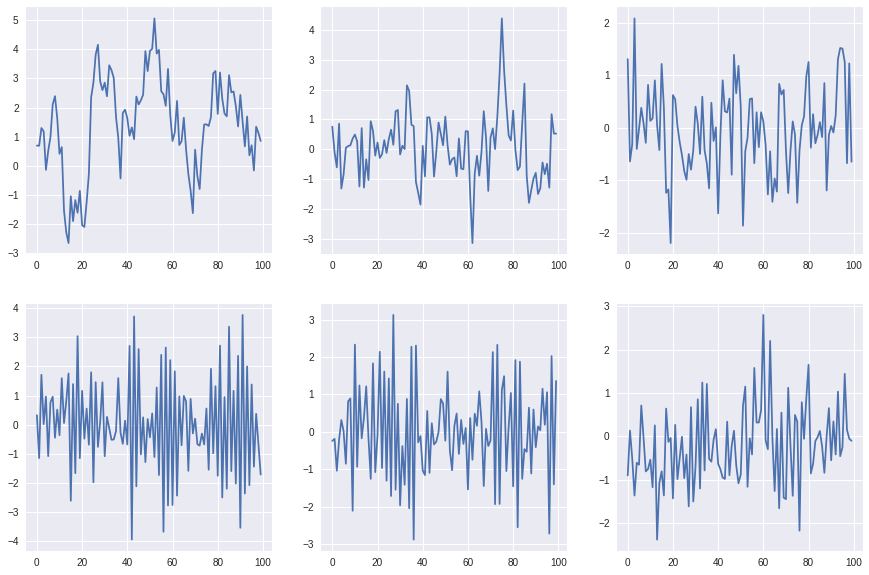

In [60]:
# phi = 0.9, 0.5, 0.1. , -0.1, -0.5, -0.9
fig, ax = plt.subplots(figsize=(15,10),nrows=2, ncols=3)
sample1 = generate_ar1_sample(0.9)
sample2 = generate_ar1_sample(0.5)
sample3 = generate_ar1_sample(0.1)
sample4 = generate_ar1_sample(-0.1)
sample5 = generate_ar1_sample(-0.5)
sample6 = generate_ar1_sample(-0.9)
ax[0,0].plot(sample1)
ax[0,1].plot(sample2)
ax[0,2].plot(sample3)
ax[1,2].plot(sample4)
ax[1,1].plot(sample5)
ax[1,0].plot(sample6)
plt.show()

#### Pattern of ACF for AR(1) Model

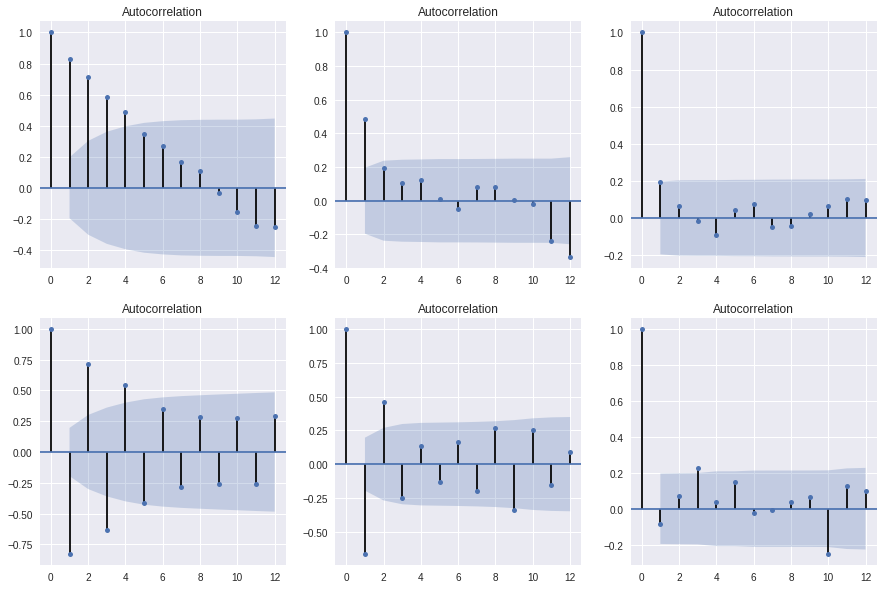

In [61]:
fig, ax = plt.subplots(figsize=(15,10),nrows=2, ncols=3)
plot_acf(sample1, ax=ax[0,0],lags=12)
plot_acf(sample2, ax=ax[0,1],lags=12)
plot_acf(sample3, ax=ax[0,2],lags=12)
plot_acf(sample4, ax=ax[1,2],lags=12)
plot_acf(sample5, ax=ax[1,1],lags=12)
plot_acf(sample6, ax=ax[1,0],lags=12)
plt.show()

lets plot the acf for the earth quake series

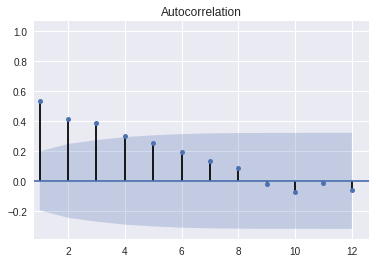

In [67]:
plot_acf(df1['q'], lags=12)
plt.xlim(0.8,)
plt.show()

In [68]:
sm.tsa.acf(df1['q'])[1:]

array([ 5.33529818e-01,  4.13351957e-01,  3.84699165e-01,  3.02031207e-01,
        2.55267991e-01,  1.93142834e-01,  1.33538315e-01,  8.61675182e-02,
       -1.87325596e-02, -7.56152803e-02, -1.54853280e-02, -5.81596895e-02,
       -1.05996435e-01, -1.30543952e-01, -1.28167018e-01, -1.81876361e-01,
       -6.21049631e-02, -6.29383548e-02, -3.08289617e-04, -4.37133902e-02,
       -4.68826838e-02,  1.20074753e-02, -8.57186333e-02, -5.40813469e-02,
        4.24829271e-02,  1.16856133e-01,  4.19512525e-02,  4.73948273e-02,
        2.64524890e-03,  5.86883992e-02,  4.29754358e-02,  9.75755818e-02,
        8.31475696e-02,  5.56914651e-02, -7.23254201e-04, -4.61625189e-02,
       -1.55207619e-02, -8.17901954e-02, -8.46166985e-02, -1.41823736e-01])

In [69]:
sm.tsa.acf(df1['q'])[1]**2

0.2846540671887729

The sample correlation taper, although not as fast as they should for an AR(1) model. For instance theoratically the lag 2 auto correlation = sqare of lag1 auto correlation. 
here lag 2 auto correlation = 4.133, which is a bit higher than squared value of lag 1 auto correlation( $0.5335^2 = 0.2846$ ).but we namage to do ok with AR(1) model for the data. For instance the residuals looked ok. This brings up an important point - the sample ACF will rarely fits a perfect theoratical pattern. In practice you might have to fit few models to find the one that fits. 

**A reminder** residuals usually are theoratically assumed to have an ACF that has correlation =0 for all lags.

#### Example 2
Here’s a time series of the daily cardiovascular mortality rate in Los Angeles County, 1970-1979

In [73]:
cardio = pd.read_csv("./data/CardioVascMort.csv", header=None)
cardio.columns = ["mortality"]
cardio.head()

,mortality
0,97.85
1,104.64
2,94.36
3,98.05
4,95.85


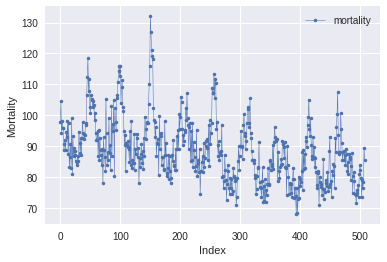

In [78]:
cardio.plot(lw=0.5, marker='.')
plt.ylabel("Mortality")
plt.xlabel("Index")
plt.show()

There is a slight downward trend, so the series may not be stationary. to create(possibly) stationary series, we’ll examine the **first differences** $y_{t} = x_{t} - x_{t-1}$. This is a common time series method for creating a detrended time series. and thus potentially a stationary series. Think about a straight line – there are constant differences in average $y$ for each change of 1-unit in $x$. 

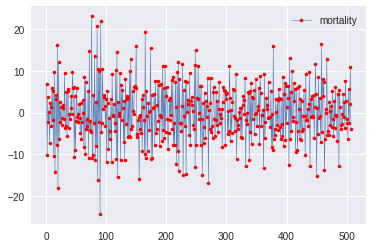

In [81]:
cardio.diff().plot(lw=0.5, marker='.', markerfacecolor='r', markeredgecolor='r')
plt.show()